In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random
from array import array

Welcome to JupyROOT 6.21/01


In [3]:
from ROOT import TCanvas, TFile, TProfile, TNtuple, TH1D, TH2D, TH3D, TGraph, TMultiGraph, TPad  
DataFile_00 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_00.root")
DataFile_01 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_01.root")
DataFile_02 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_02.root")
DataFile_03 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_03.root")
DataFile_04 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_04.root")
DataFile_05 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_05.root")
DataFile_06 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_06.root")
DataFile_07 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_07.root")
DataFile_08 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_08.root")
DataFile_09 = ROOT.TFile("/home/fardousr/Project/Proton_Beam_Therapy/Data/Data/ProtonTherapyDataFile_00.root")

In [4]:
DoseAverageLETComHist= DataFile_00.Get('ProtonLongDoseLETCom')+DataFile_01.Get('ProtonLongDoseLETCom')+ \
                       DataFile_02.Get('ProtonLongDoseLETCom')+DataFile_03.Get('ProtonLongDoseLETCom')+\
                       DataFile_04.Get('ProtonLongDoseLETCom')+DataFile_05.Get('ProtonLongDoseLETCom')+\
                       DataFile_06.Get('ProtonLongDoseLETCom')+DataFile_07.Get('ProtonLongDoseLETCom')+\
                       DataFile_08.Get('ProtonLongDoseLETCom')+DataFile_09.Get('ProtonLongDoseLETCom')

DoseAverageLETCalHist= DataFile_00.Get('ProtonLongDoseLETCal')+DataFile_01.Get('ProtonLongDoseLETCal')+\
                       DataFile_02.Get('ProtonLongDoseLETCal')+DataFile_03.Get('ProtonLongDoseLETCal')+\
                       DataFile_04.Get('ProtonLongDoseLETCal')+DataFile_05.Get('ProtonLongDoseLETCal')+\
                       DataFile_06.Get('ProtonLongDoseLETCal')+DataFile_07.Get('ProtonLongDoseLETCal')+\
                       DataFile_08.Get('ProtonLongDoseLETCal')+DataFile_09.Get('ProtonLongDoseLETCal')

TotalBinEnergy = DataFile_00.Get('ProtonLongEnergyDepoHist')+DataFile_01.Get('ProtonLongEnergyDepoHist')+\
                 DataFile_02.Get('ProtonLongEnergyDepoHist')+DataFile_03.Get('ProtonLongEnergyDepoHist')+\
                 DataFile_04.Get('ProtonLongEnergyDepoHist')+DataFile_05.Get('ProtonLongEnergyDepoHist')+\
                 DataFile_06.Get('ProtonLongEnergyDepoHist')+DataFile_07.Get('ProtonLongEnergyDepoHist')+\
                 DataFile_08.Get('ProtonLongEnergyDepoHist')+DataFile_09.Get('ProtonLongEnergyDepoHist')

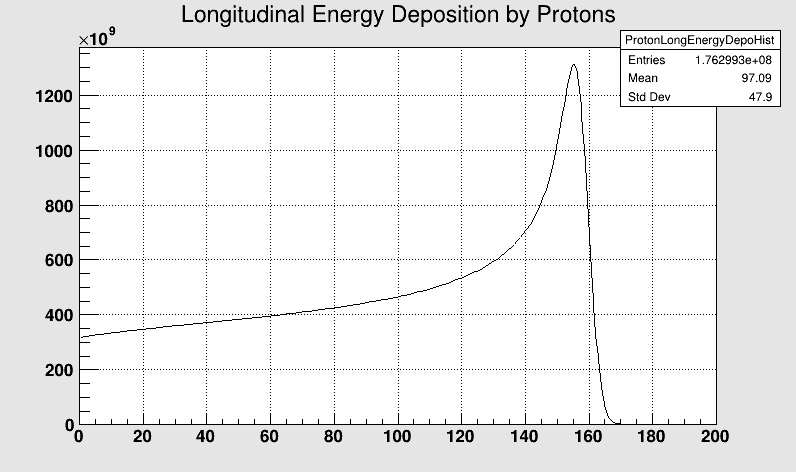

In [5]:
c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

TotalBinEnergy.Draw("HIST C")
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

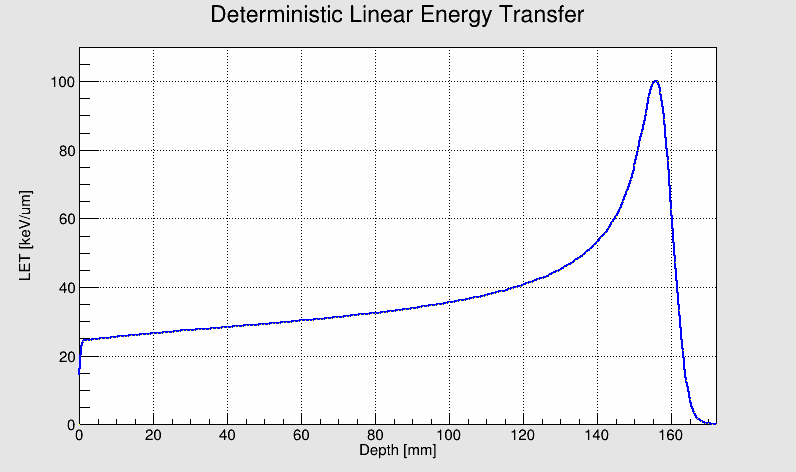

In [6]:
Energy  = array( 'd' )
depth = array( 'd' )

max = TotalBinEnergy.GetMaximum()

for i in range(0,200):    
    d = TotalBinEnergy.GetBinContent(i)
    Energy.append((d/max)*100)
    depth.append(i+0)

dosegraph = TGraph(200, depth, Energy)
dosegraph.SetLineColor( 4 )
dosegraph.SetLineWidth( 2 )
dosegraph.SetMarkerColor( 5 )
dosegraph.GetXaxis().CenterTitle();
dosegraph.GetYaxis().CenterTitle();

dosegraph.SetMarkerStyle( 0 )
dosegraph.SetTitle( 'Deterministic Linear Energy Transfer' )
dosegraph.GetXaxis().SetTitle( 'Depth [mm]' )
dosegraph.GetXaxis().SetLimits(0, 172)
dosegraph.GetYaxis().SetTitle( 'LET [keV/um]' )
dosegraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


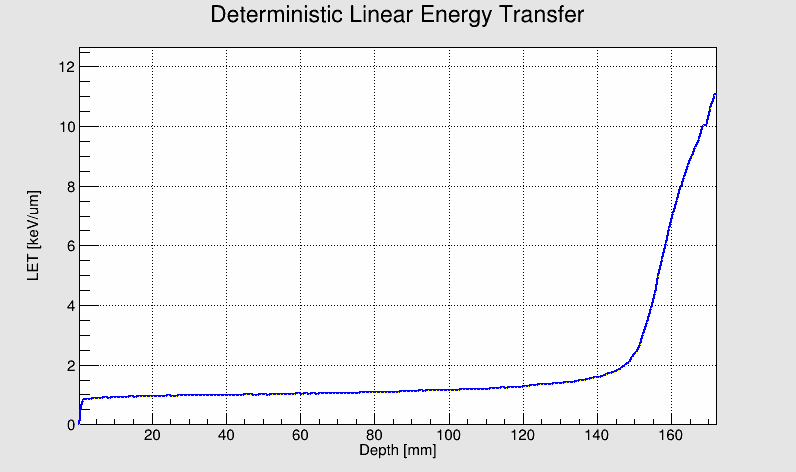

In [7]:
DoseAverageLETCom =  DoseAverageLETComHist/TotalBinEnergy

DeterministicDoseAveragedLET = array( 'd' )
Dose  = array( 'd' )
depth = array( 'd' )

max = TotalBinEnergy.GetMaximum()

for i in range(0,200):
    let = DoseAverageLETCom.GetBinContent(i)
    d = TotalBinEnergy[i]/max
    DeterministicDoseAveragedLET.append(let)
    Dose.append(d*100)
    depth.append(i+0.5)

c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

DetLETgraph = TGraph( 200, depth, DeterministicDoseAveragedLET)
DetLETgraph.SetLineColor( 4 )
DetLETgraph.SetLineWidth( 2 )
DetLETgraph.SetMarkerColor( 5 )
DetLETgraph.GetXaxis().CenterTitle();
DetLETgraph.GetYaxis().CenterTitle();

DetLETgraph.SetMarkerStyle( 0 )
DetLETgraph.SetTitle( 'Deterministic Linear Energy Transfer' )
DetLETgraph.GetXaxis().SetTitle( 'Depth [mm]' )
DetLETgraph.GetXaxis().SetLimits(0.5, 172)
DetLETgraph.GetYaxis().SetTitle( 'LET [keV/um]' )
DetLETgraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


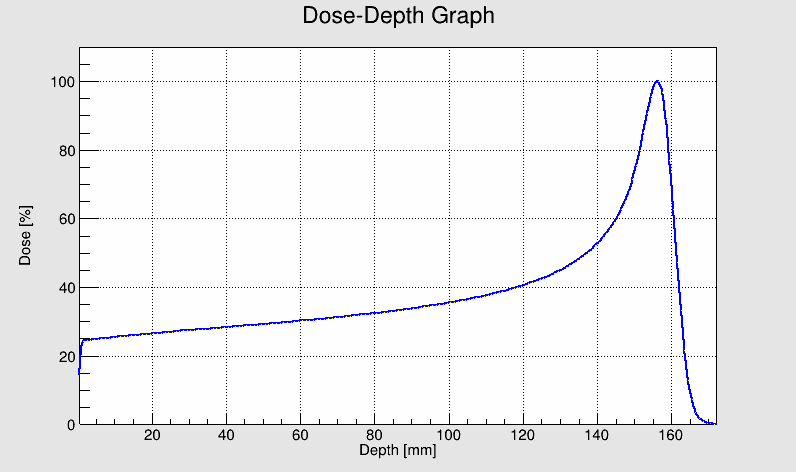

In [8]:
c1 = TCanvas( 'c1', 'Deterministic LET', 200, 10, 800, 500)

Dosegraph = TGraph( 200, depth, Dose)
Dosegraph.SetLineColor( 4 )
Dosegraph.SetLineWidth( 2 )
Dosegraph.SetMarkerColor( 5 )
Dosegraph.GetXaxis().CenterTitle();
Dosegraph.GetYaxis().CenterTitle();

Dosegraph.SetMarkerStyle( 0 )
Dosegraph.SetTitle( 'Dose-Depth Graph' )
Dosegraph.GetXaxis().SetTitle( 'Depth [mm]' )
Dosegraph.GetXaxis().SetLimits(0.5, 172)
Dosegraph.GetYaxis().SetTitle( 'Dose [%]' )
Dosegraph.Draw( 'ACP' )

c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


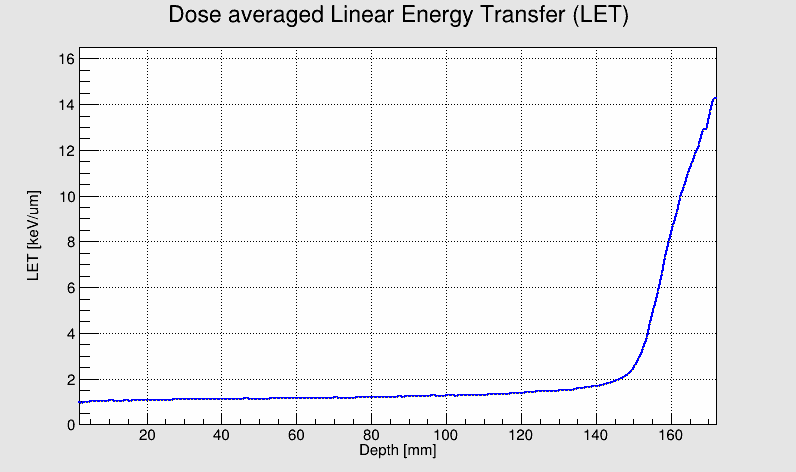

In [9]:
DoseAverageLETCal =  DoseAverageLETCalHist/TotalBinEnergy

DoseAveragedLET = array( 'd' )
depth = array( 'd' )

max = DoseAverageLETCal.GetMaximum()

for i in range(0,200):
    let = DoseAverageLETCal.GetBinContent(i)
    DoseAveragedLET.append(let*10**-6)
    depth.append(i+0.5)

c1 = TCanvas( 'c1', 'Dose averaged LET', 200, 10, 800, 500 )
gr = TGraph( 200, depth, DoseAveragedLET)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Dose averaged Linear Energy Transfer (LET)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(2, 172)
gr.GetYaxis().SetTitle( 'LET [keV/um]' )
gr.Draw( 'ACP' )


c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )
c1.SetGridx()
c1.SetGridy()
c1.Modified()
c1.Update()
c1.Draw()

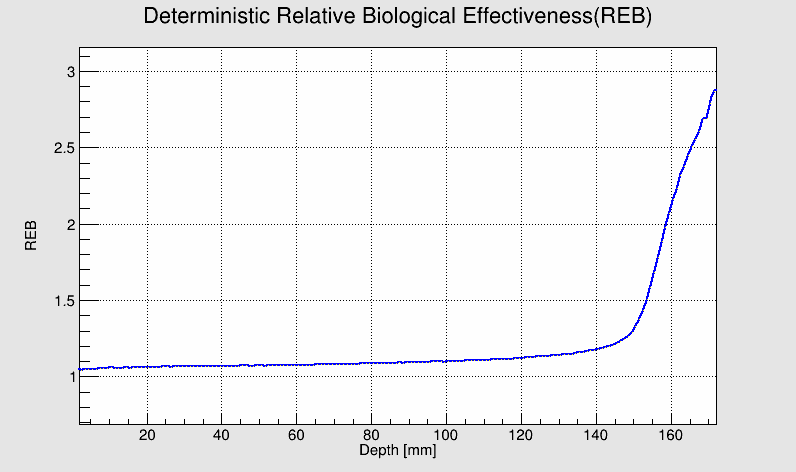

In [10]:
DeterministicREB   = array( 'd' )
depth = array( 'd' )

for i in range(0,200):
    let = DeterministicDoseAveragedLET[i]
    reb = 0.892 + (0.179*let)
    DeterministicREB.append(reb)
    depth.append(i+0.5)


gr = TGraph( 200, depth, DeterministicREB)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Deterministic Relative Biological Effectiveness(REB)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(2, 172)
gr.GetYaxis().SetTitle( 'REB' )
gr.Draw( 'ACP' )

# TCanvas.Update() draws the frame, after which one can change it
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )

c1.Modified()
c1.Update()
c1.Draw()


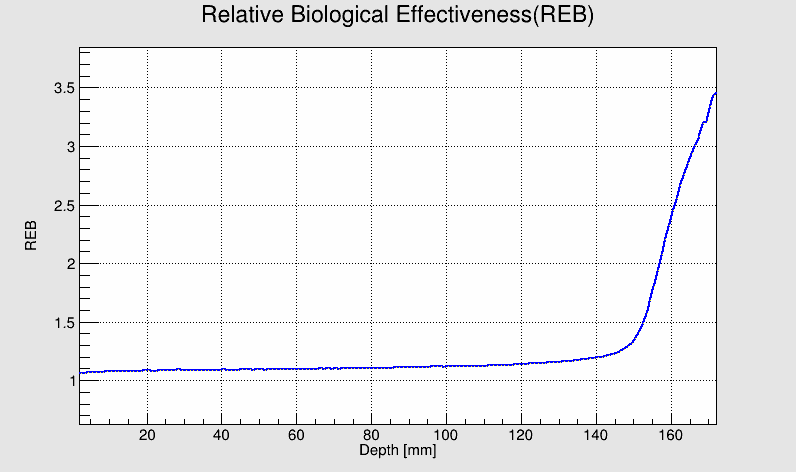

In [11]:
REB   = array( 'd' )
depth = array( 'd' )

for i in range(0,200):
    let = DoseAveragedLET[i]
    reb = 0.892 + (0.179*let)
    REB.append(reb)
    depth.append(i+0.5)
n = len(depth)
m = len(REB)


gr = TGraph( 200, depth, REB)
gr.SetLineColor( 4 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 5 )
gr.GetXaxis().CenterTitle();
gr.GetYaxis().CenterTitle();

gr.SetMarkerStyle( 0 )
gr.SetTitle( 'Relative Biological Effectiveness(REB)' )
gr.GetXaxis().SetTitle( 'Depth [mm]' )
gr.GetXaxis().SetLimits(2, 172)
gr.GetYaxis().SetTitle( 'REB' )
gr.Draw( 'ACP' )

# TCanvas.Update() draws the frame, after which one can change it
c1.Update()
c1.GetFrame().SetFillColor( 10)
c1.GetFrame().SetBorderSize( 12 )
c1.GetFrame().SetBorderMode(0); 
c1.SetFillColor( 18 )

c1.Modified()
c1.Update()
c1.Draw()


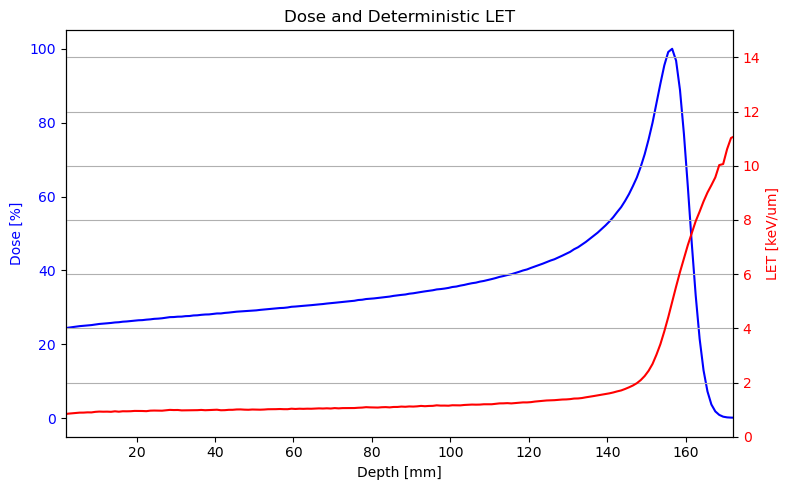

In [12]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DeterministicDoseAveragedLET, color='red')
ax2.grid(True, 'both')
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Deterministic LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

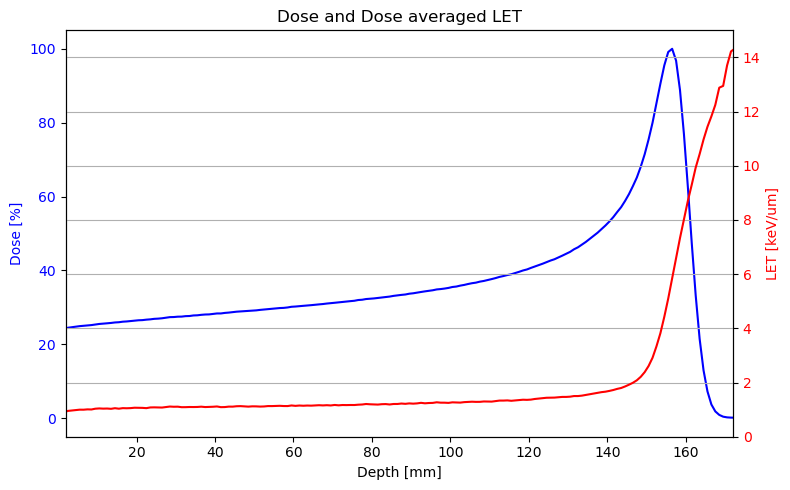

In [13]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DoseAveragedLET, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Dose averaged LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

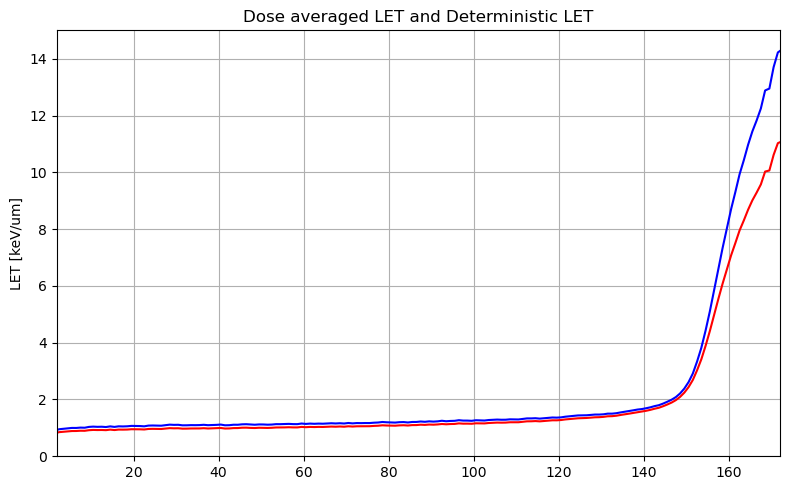

In [14]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.plot(depth, DoseAveragedLET, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
 
ax1.set_ylabel('LET [keV/um]', color='black') 
ax1.plot(depth, DeterministicDoseAveragedLET, color='red')
ax1.grid(True)
plt.ylim(0,15)
plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='black')

plt.title('Dose averaged LET and Deterministic LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

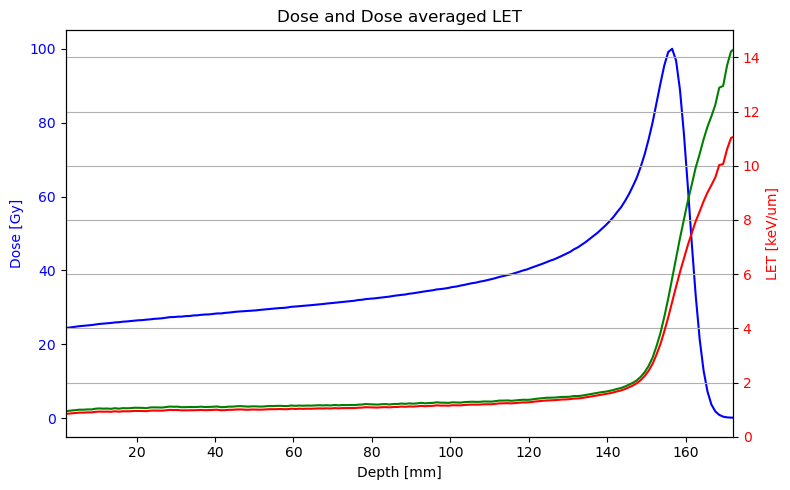

In [15]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [Gy]', color='blue')
ax1.plot(depth, Dose, color='blue')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DoseAveragedLET, color='green')
ax2.plot(depth, DeterministicDoseAveragedLET, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Dose averaged LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

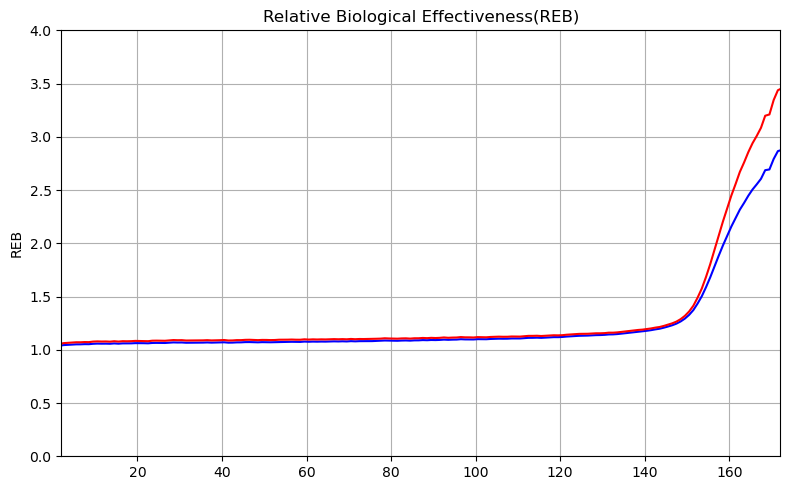

In [16]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

fig, ax1 = plt.subplots()

ax1.plot(depth, DeterministicREB, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
 
ax1.set_ylabel('REB', color='black') 
ax1.plot(depth, REB, color='red')
ax1.grid(True)
ax1.tick_params(axis='y', labelcolor='black')

plt.ylim(0,4)
plt.xlim(2,172)

plt.title('Relative Biological Effectiveness(REB)')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

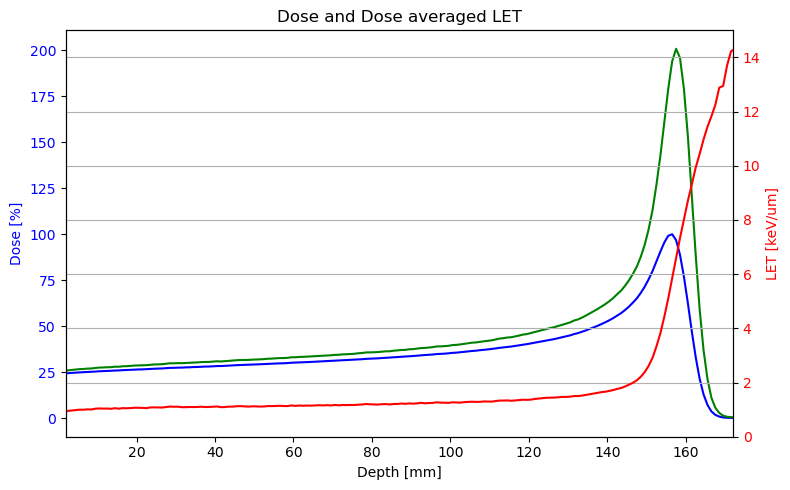

In [17]:
from pylab import rcParams
plt.rcdefaults()
rcParams['figure.figsize'] = 8, 5
plt.rcParams['axes.facecolor'] = 'white'

REBweightedDose = np.array(Dose)*np.array(REB)

fig, ax1 = plt.subplots()

ax1.set_xlabel('Depth [mm]')
ax1.set_ylabel('Dose [%]', color='blue')
ax1.plot(depth, Dose, color='blue')
ax1.plot(depth, REBweightedDose, color='green')

plt.xlim(2,172)
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()  
ax2.set_ylabel('LET [keV/um]', color='red') 
ax2.plot(depth, DoseAveragedLET, color='red')
ax2.grid(True)
plt.ylim(0,15)
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Dose and Dose averaged LET')
fig.tight_layout() 

#plt.savefig('Dose_REB_Depth.png', dpi=400)
plt.show()

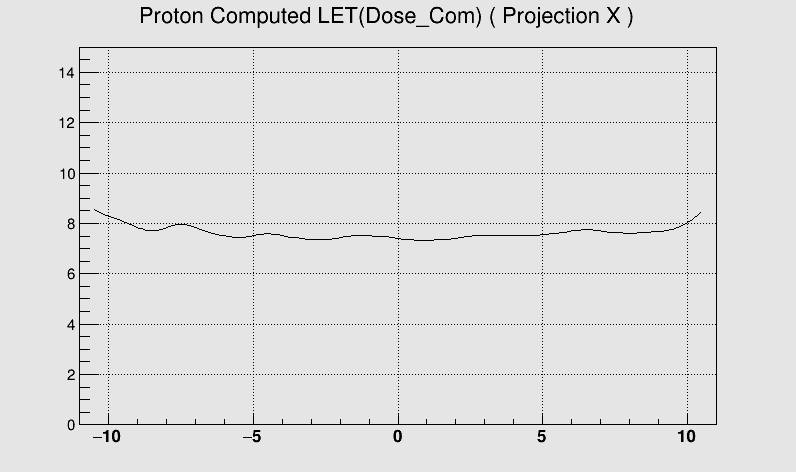

In [19]:

DoseLETCom3DHist = TH3D()
ymax = 200
ymin =-200
zmax = 160
zmin = 163

DoseLETComXPro   = DataFile_00.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('Proton3DDoseLETCom').ProjectionX('',-ymin, ymax,zmax,zmin)

EnergyDepoXPro   = DataFile_00.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)


LETComXPro = DoseLETComXPro/EnergyDepoXPro
LETComXPro.Draw("HIST C")
LETComXPro.GetXaxis().CenterTitle();
LETComXPro.GetYaxis().CenterTitle();
LETComXPro.GetXaxis().SetRangeUser(-11, 11);
LETComXPro.GetYaxis().SetRangeUser(0, 15);
LETComXPro.SetStats(0)
c1.Modified()
c1.Update()
c1.Draw()

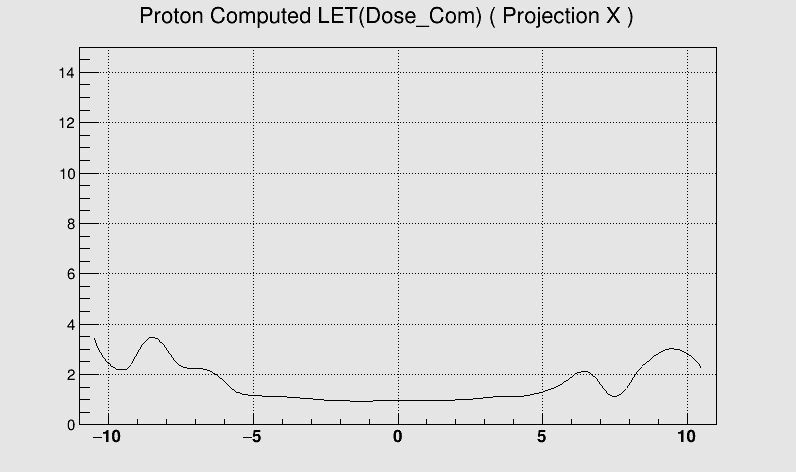

In [20]:

DoseLETCom3DHist = TH3D()
ymax = 200
ymin =-200
zmax = 100
zmin = 102

DoseLETComXPro   = DataFile_00.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('Proton3DDoseLETCal').ProjectionX('',-ymin, ymax,zmax,zmin)

EnergyDepoXPro   = DataFile_00.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_01.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_02.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_03.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_04.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_05.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_06.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_07.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_08.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)+\
                   DataFile_09.Get('ProtonSpacialEnergyDepoHist').ProjectionX('',-ymin, ymax,zmax,zmin)


LETComXPro = (DoseLETComXPro*10**-6)/EnergyDepoXPro
LETComXPro.Draw("HIST C")
LETComXPro.GetXaxis().CenterTitle();
LETComXPro.GetYaxis().CenterTitle();
LETComXPro.GetXaxis().SetRangeUser(-11, 11);
LETComXPro.GetYaxis().SetRangeUser(0, 15);
LETComXPro.SetStats(0)
c1.Modified()
c1.Update()
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


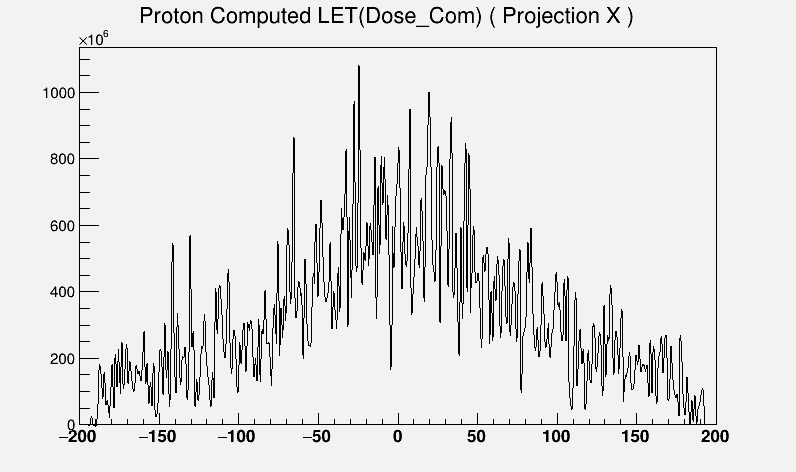

In [47]:
hist = DataFile_02.Get('Proton3DDoseLETCom')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
h = hist.ProjectionX('ProX', 100, 150)
h.Draw("HIST C")
h.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: can1


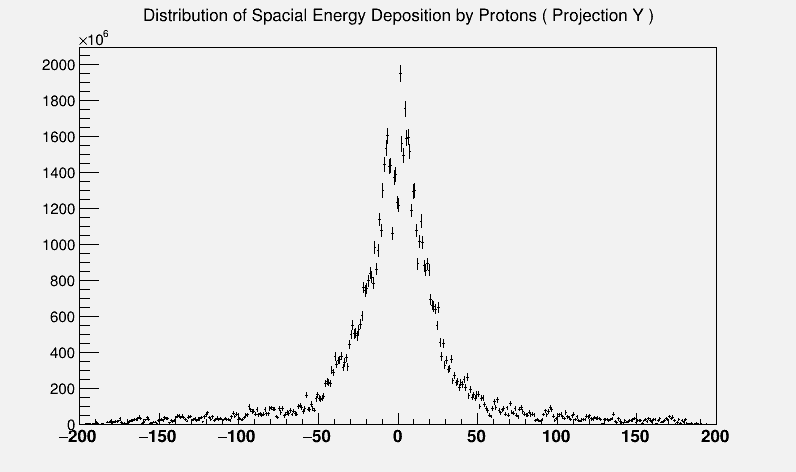

In [33]:
hist = DataFile_00.Get('ProtonSpacialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
h1 = hist.ProjectionY("x", 0, 180)
h1.Draw("COLZ")
h1.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllTrans(X)EnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-25, 25);
hist.Draw("HIST C")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTrans(X)EnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-25, 25);
hist.Draw("HIST C")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllTransverseEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-50, 50);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTransverseEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetXaxis().SetRangeUser(-50, 50);
hist.GetYaxis().SetRangeUser(-50, 50);
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllRadialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetYaxis().SetRangeUser(0, 30);
hist.Draw("CONT")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonRadialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetYaxis().SetRangeUser(0, 30);
hist.Draw("CONT")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('AllTransXLongEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.Draw("CONT")
hist.GetYaxis().SetRangeUser(-20, 20);
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTransXLongEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Energy [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetYaxis().SetRangeUser(-20, 20);
hist.Draw("CONT")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonTransXLongEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )

hist.Draw()
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonSpacialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("X [mm]");
hist.GetYaxis().SetTitle("Y [eV]");
hist.GetZaxis().SetTitle("Z [eV]");
hist.Draw()
hist.GetXaxis().CenterTitle();
hist.GetYaxis().CenterTitle();
hist.GetZaxis().CenterTitle();
hist.Draw("COLZ")
hist.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist = DataFile.Get('ProtonSpacialEnergyDepoHist')
can1 = TCanvas( 'can1', 'Longitudinal Energy Deposition by All Partiicles', 800, 500 )
can1.SetFillColor( 19 )
can1.GetFrame().SetFillColor( 21 )
can1.GetFrame().SetBorderSize( 6 )
can1.GetFrame().SetBorderMode( -1 )
h1 = hist.ProjectionY("x", 100, 101)
h1.Draw("COLZ")
h1.SetStats(0)
can1.Modified()
can1.Update()
can1.Draw()

In [ ]:
hist1 = DataFile.Get('ProtonLongDoseLETCom')
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist1.GetXaxis().SetTitle("Depth [mm]");
hist1.GetYaxis().SetTitle("Transverse [mm]");
hist1.Draw()
hist1.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
hist2 = DataFile.Get('ProtonLongEnergyDepoHist')
c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist2.GetXaxis().SetTitle("Depth [mm]");
hist2.GetYaxis().SetTitle("Transverse [mm]");
hist2.Draw()
hist2.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
hist = hist1/hist2

c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse [mm]");
hist.Draw()
hist.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()

In [ ]:
hist3 = DataFile.Get('ProtonLongDoseLETCal')
c = TCanvas( 'c', 'Dynamic Filling Example', 200, 10, 700, 500 )
c.SetFillColor( 19 )
c.GetFrame().SetFillColor( 21 )
c.GetFrame().SetBorderSize( 6 )
c.GetFrame().SetBorderMode( -1 )
hist3.GetXaxis().SetTitle("Depth [mm]");
hist3.GetYaxis().SetTitle("Transverse [mm]");
hist3.Draw()
hist3.Draw("HIST SAME C")
c.Modified()
c.Update()
c.Draw()

In [ ]:
hist = hist3/hist2

c1 = TCanvas( 'c1', 'Dynamic Filling Example', 200, 10, 700, 500 )
c1.SetFillColor( 19 )
c1.GetFrame().SetFillColor( 21 )
c1.GetFrame().SetBorderSize( 6 )
c1.GetFrame().SetBorderMode( -1 )
hist.GetXaxis().SetTitle("Depth [mm]");
hist.GetYaxis().SetTitle("Transverse [mm]");
hist.Draw()
hist.Draw("HIST SAME C")
c1.Modified()
c1.Update()
c1.Draw()